In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [131]:
data=pd.read_csv('voice.csv')

In [132]:
data.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000   male  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632   male  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512   male  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119   male  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274   male  

[5 rows x 21 columns]

In [133]:
data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

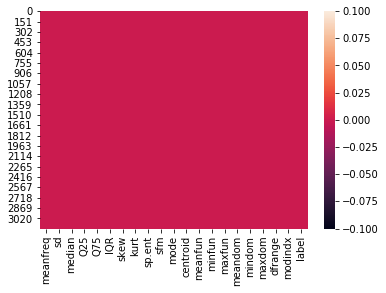

In [134]:
sns.heatmap(data.isnull())

In [135]:
data.describe().T

count       mean         std       min       25%       50%  \
meanfreq  3168.0   0.180907    0.029918  0.039363  0.163662  0.184838   
sd        3168.0   0.057126    0.016652  0.018363  0.041954  0.059155   
median    3168.0   0.185621    0.036360  0.010975  0.169593  0.190032   
Q25       3168.0   0.140456    0.048680  0.000229  0.111087  0.140286   
Q75       3168.0   0.224765    0.023639  0.042946  0.208747  0.225684   
IQR       3168.0   0.084309    0.042783  0.014558  0.042560  0.094280   
skew      3168.0   3.140168    4.240529  0.141735  1.649569  2.197101   
kurt      3168.0  36.568461  134.928661  2.068455  5.669547  8.318463   
sp.ent    3168.0   0.895127    0.044980  0.738651  0.861811  0.901767   
sfm       3168.0   0.408216    0.177521  0.036876  0.258041  0.396335   
mode      3168.0   0.165282    0.077203  0.000000  0.118016  0.186599   
centroid  3168.0   0.180907    0.029918  0.039363  0.163662  0.184838   
meanfun   3168.0   0.142807    0.032304  0.055565  0.116998  0.140519   
minfun    3168.0   0.036802    0.019220  0.009775  0.018223  0.046110   
maxfun    3168.0   0.258842    0.030077  0.103093  0.253968  0.271186   
meandom   3168.0   0.829211    0.525205  0.007812  0.419828  0.765795   
mindom    3168.0   0.052647    0.063299  0.004883  0.007812  0.023438   
maxdom    3168.0   5.047277    3.521157  0.007812  2.070312  4.992188   
dfrange   3168.0   4.994630    3.520039  0.000000  2.044922  4.945312   
modindx   3168.0   0.173752    0.119454  0.000000  0.099766  0.139357   

                75%          max  
meanfreq   0.199146     0.251124  
sd         0.067020     0.115273  
median     0.210618     0.261224  
Q25        0.175939     0.247347  
Q75        0.243660     0.273469  
IQR        0.114175     0.252225  
skew       2.931694    34.725453  
kurt      13.648905  1309.612887  
sp.ent     0.928713     0.981997  
sfm        0.533676     0.842936  
mode       0.221104     0.280000  
centroid   0.199146     0.251124  
meanfun    0.169581     0.237636  
minfun     0.047904     0.204082  
maxfun     0.277457     0.279114  
meandom    1.177166     2.957682  
mindom     0.070312     0.458984  
maxdom     7.007812    21.867188  
dfrange    6.992188    21.843750  
modindx    0.209183     0.932374

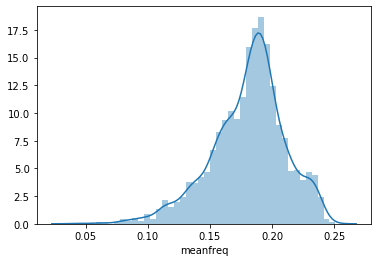

In [136]:
sns.distplot(data['meanfreq'],kde=True)

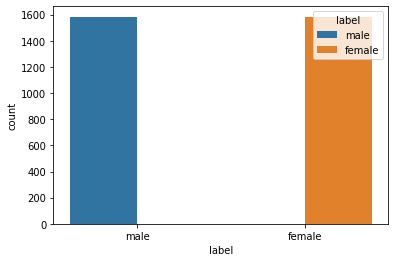

In [137]:
sns.countplot(data=data,x='label',hue='label')

In [138]:
len(data['label']=='male'),len(data['label']=='female')

(3168, 3168)

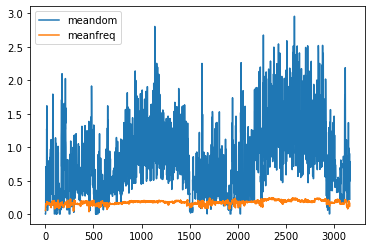

In [139]:
data[['meandom','meanfreq']].plot()

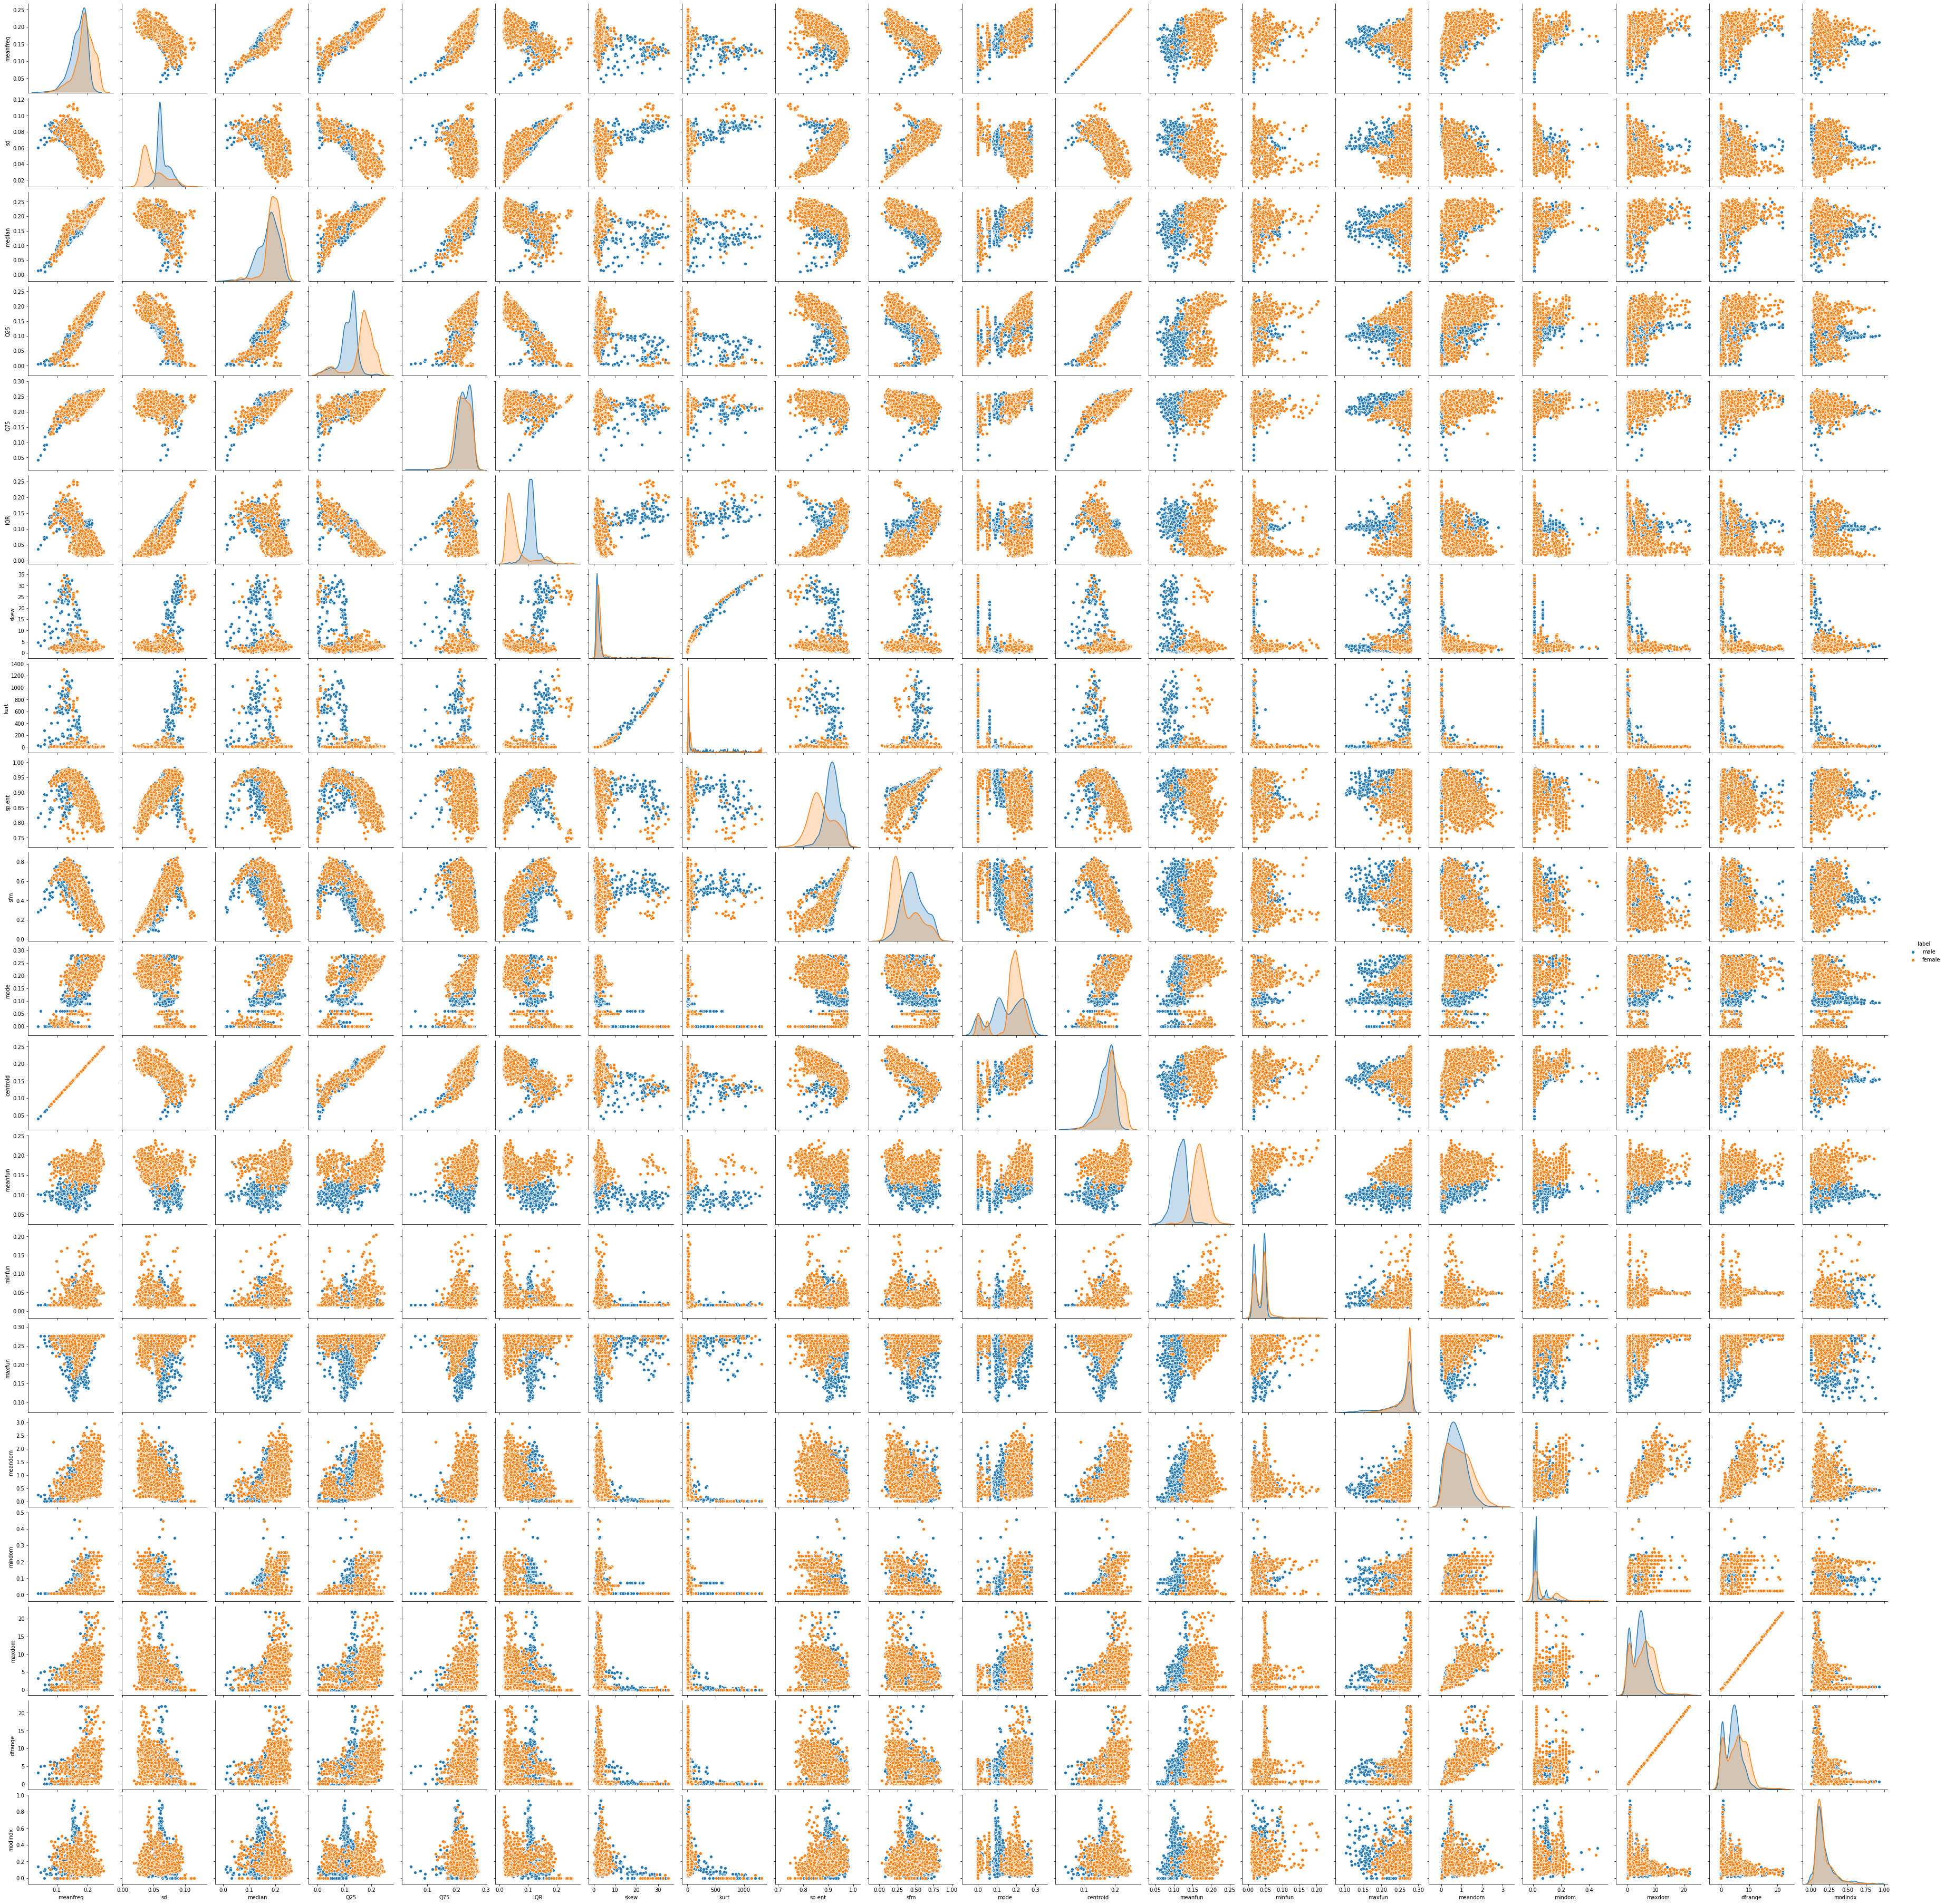

In [140]:
sns.pairplot(data,hue='label')

In [141]:
y=data.iloc[:,-1]

In [142]:
encoder=LabelEncoder()
y=encoder.fit_transform(y)

In [143]:
X=data.iloc[:,:-1]
X.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  0.000000  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  0.000000  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  0.000000  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  0.083878  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  0.104261  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274

In [144]:
scaler=StandardScaler()

In [145]:
X=scaler.fit_transform(X)

In [146]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [147]:
svm=SVC()
svm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [148]:
svm.score(X_train,y_train)

0.9869192602616148

In [149]:
svm.score(X_test,y_test)

0.9737118822292324

In [150]:
y_pred=svm.predict(X_test)

In [151]:
accuracy_score(y_test,y_pred)

0.9737118822292324

In [152]:
confusion_matrix(y_test,y_pred)

array([[458,  13],
       [ 12, 468]], dtype=int64)

In [153]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       471
           1       0.97      0.97      0.97       480

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951



In [154]:
from sklearn.model_selection import GridSearchCV

In [155]:
param_grid={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}

In [156]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,verbose=2,n_jobs=-1)

In [157]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    2.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [158]:
grid.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [159]:
grid.best_params_

{'C': 1, 'gamma': 0.1}

In [160]:
grid.best_score_

0.9828584792467412

In [161]:
y_pred=grid.predict(X_test)

In [162]:
accuracy_score(y_test,y_pred)

0.9747634069400631

In [163]:
confusion_matrix(y_test,y_pred)

array([[459,  12],
       [ 12, 468]], dtype=int64)

In [164]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       471
           1       0.97      0.97      0.97       480

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951

